In [1]:
from tensorflow.python.keras.applications.vgg16 import VGG16

model = VGG16()

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
#顯示VGG16的網路資訊
#Conv2d為卷積層
#Dense為fully-connection層
#VGG16網路輸出為1000個類別


#Param的計算方式: (27+1)*64=1792
#27表示輸入資料維度
#1表示每個神經元都有一個參數bias
#64表示神經元數量

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [25]:
#讀取圖片
#需安裝PIL套件，以利處理圖片
#轉為VGG標準輸入格式: 224*224
#dog.jpg為1024*683
#cat.jpg為1024*768

from tensorflow.python.keras.preprocessing.image import load_img

img_dog = load_img('img/dog1.jpg', target_size=(224, 224))
img_cat = load_img('img/cat1.jpg', target_size=(224, 224))

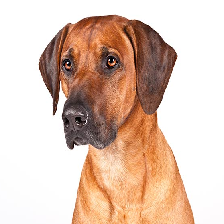

In [26]:
img_dog

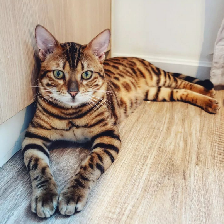

In [27]:
img_cat

In [28]:
#模型輸入為ndarray格式

from tensorflow.python.keras.preprocessing.image import img_to_array


arr_dog = img_to_array(img_dog)
arr_cat = img_to_array(img_cat)

In [29]:
#將圖片轉為BGR色彩空間
#如果用opencv 也是需要轉

from tensorflow.python.keras.applications.vgg16 import preprocess_input


arr_cat = preprocess_input(arr_cat)
arr_dog = preprocess_input(arr_dog)

In [30]:
#準備將圖片輸入模型
#將兩張照片資料合併起來

import numpy as np

arr_input = np.stack([arr_dog, arr_cat])

In [31]:
print("狗:", arr_dog.shape)
print("貓:", arr_cat.shape)

#張量(資料筆數，圖片大小，色階)
print("合併後:", arr_input.shape)

狗: (224, 224, 3)
貓: (224, 224, 3)
合併後: (2, 224, 224, 3)


In [32]:
#進行預測
#預測VGG之1000個分類

probs = model.predict(arr_input)

#兩張圖片，在1000個分類的結果
print('shape of probs:', probs.shape)

probs

shape of probs: (2, 1000)


array([[3.1299065e-12, 1.7802105e-11, 7.4545864e-12, ..., 1.0026322e-12,
        2.8203322e-11, 7.9376790e-09],
       [4.4290792e-07, 2.5137517e-06, 1.9773047e-06, ..., 3.3461080e-07,
        8.2304296e-06, 3.3196181e-03]], dtype=float32)

In [33]:
#解譯預測結果
#下載分類說明，例如: 0: 丁鯛, 1: 金魚...

from tensorflow.python.keras.applications.vgg16 import decode_predictions

results = decode_predictions(probs)

In [34]:
#第一張
results[0]

[('n02087394', 'Rhodesian_ridgeback', 0.98625076),
 ('n02109047', 'Great_Dane', 0.011558502),
 ('n02090379', 'redbone', 0.0015225151),
 ('n02100583', 'vizsla', 0.00029092285),
 ('n02108422', 'bull_mastiff', 0.00022533385)]

In [35]:
#第二張
results[1]

[('n02124075', 'Egyptian_cat', 0.3219036),
 ('n02123045', 'tabby', 0.3119601),
 ('n02123159', 'tiger_cat', 0.24486166),
 ('n02127052', 'lynx', 0.010533287),
 ('n04040759', 'radiator', 0.006032228)]